# Data analysis on spectra

In [1]:
import sys
sys.path.append("C:\\Users\\User\\Vrije Universiteit Brussel\\Mehdi Feizpour - Halewijn's Thesis Project\\master thesis\\other")
sys.path.append("C:\\Users\\mfeizpou\\OneDrive - Vrije Universiteit Brussel\\Halewijn's Thesis Project\\master thesis\other")


import importlib
import my_functions as mf
import filepaths as fp
import color_maps as cm
import variables
import classes
mf = importlib.reload(mf)
fp = importlib.reload(fp)
cm = importlib.reload(cm)
variables = importlib.reload(variables)
classes = importlib.reload(classes)

import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter



from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array, check_X_y
import pickle
from sklearn.metrics import accuracy_score


In [2]:
def reload_libraries(): 
    import importlib
    import my_functions as mf
    import filepaths as fp
    import color_maps as cm
    import variables
    import classes
    mf = importlib.reload(mf)
    fp = importlib.reload(fp)
    cm = importlib.reload(cm)
    variables = importlib.reload(variables)
    classes = importlib.reload(classes)
    print('done')

In [3]:
data_filepath = fp.first_semester_data_directory
image_filepath = fp.figure_filepath
filename = os.listdir(data_filepath)[0]
#read in the data
vector_df = pd.read_feather(data_filepath + '/' + filename).reset_index().rename({'index': 'measurement_index'}, axis = 1)
vector_df.iloc[:, 2:] = vector_df.iloc[:, 2:].astype('float64')
melt_df = mf.get_melt_df(vector_df)

In [4]:
melt_df

,measurement_index,Class,wavenumber,intensity
1282622,0,E coli,1000.8,-0.255437
1286329,0,E coli,1001.9,-0.230708
1290036,0,E coli,1003.1,-0.192117
1293743,0,E coli,1004.2,-0.143665
1297450,0,E coli,1005.3,-0.099369
...,...,...,...,...
1267793,3706,S pneumoniae,995.1,-0.319333
1271500,3706,S pneumoniae,996.2,-0.349634
1275207,3706,S pneumoniae,997.4,-0.271283
1278914,3706,S pneumoniae,998.5,-0.323232


In [5]:
mf.describe_class_distribution(vector_df)

,Class,num_samples,percentage
0,E coli,1318,35.6
1,H influenza,885,23.9
2,N meningitidis,748,20.2
3,S pneumoniae,756,20.4


in total, there are 3707 samples


### What are the differences withing a map? 

#### without preprocessing

done


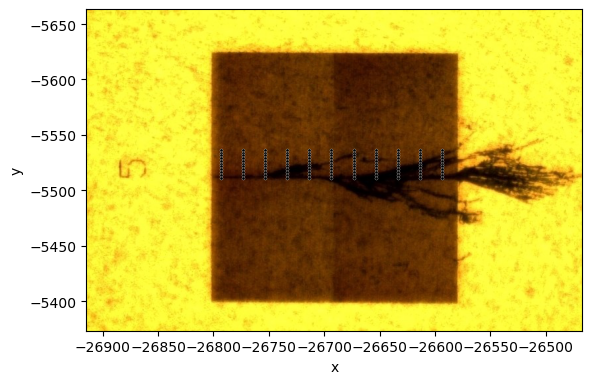

In [6]:
reload_libraries()
structured_measurement_dict = {
    'E coli': ['898f956e', '8ed404cc', '9223f703'],
    'P vulneris': ['fcf8eccf', '3b81b0bb', '3abf25a5'], 
    'S epidermis': ['a5832e62', '328e5e60'],
}
filepath = fp.raman_spectra_path + '/' + '8ed404cc.wdf'
raman_measurement = classes.RamanMeasurement(filepath , preprocessing=False)
raman_measurement.create_map_gui()

#### With preprocessing

done


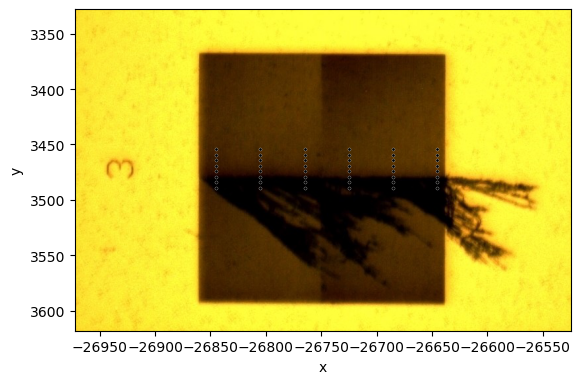

In [47]:
reload_libraries()
structured_measurement_dict = {
    'E coli': ['898f956e', '8ed404cc', '9223f703'],
    'P vulneris': ['fcf8eccf', '3b81b0bb', '3abf25a5'], 
    'S epidermis': ['a5832e62', '328e5e60'],
}
preprocessing_params = {'window_length': 20, 
                            'polyorder':3, 
                       'normalization': True, 
                       'cosmic_ray_removal':True,
                       'cosmic_ray_z_score': 5}

filepath = fp.raman_spectra_path + '/' + '328e5e60.wdf'
raman_measurement = classes.RamanMeasurement(filepath , preprocessing=True, preprocessing_params=preprocessing_params)
raman_measurement.create_map_gui()

## how does one spectrum look? 

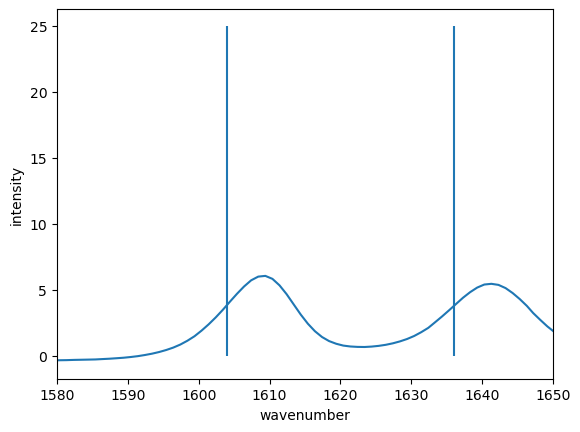

In [12]:
filename = 'random_spectrum.png'
data = mf.get_random_sample_from_class(melt_df, 'E coli', 1)

sns.lineplot(data = data, x = 'wavenumber', y = 'intensity')

# plt.xlabel(fln.spectrum_x)
# plt.ylabel(fln.spectrum_y)

# plt.savefig(fp.figure_filepath + '/' + filename)
a = 1604
b = 1636
max_height = 25
min_height = 0
vlines_array = [a,b]
y_min_array = [min_height]*len(vlines_array)
y_max_array = [max_height]*len(vlines_array)
plt.vlines(vlines_array, y_min_array, y_max_array)
plt.xlim((1580, 1650))

plt.show()

### do the peaks shift due to preprocessing?

(1580.0, 1650.0)

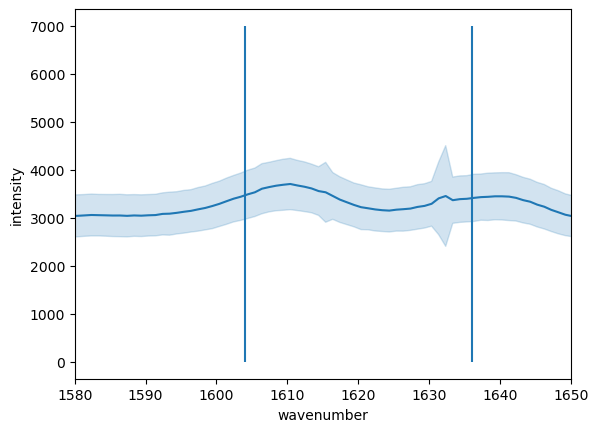

In [18]:
# without preprocessing
preprocessing_params = {'window_length': 15, 
                            'polyorder':3, 
                       'normalization': False, 
                       'cosmic_ray_removal':False,
                       'cosmic_ray_z_score': 8}
ID = '8ed404cc'
raman_studies = classes.RamanStudies(fp.raman_spectra_path, fp.raman_GUI_dataframe_path)
df = raman_studies.get_raman_measurement(ID,preprocessing = False, preprocessing_params=preprocessing_params).convert_wdf_to_csv()
sns.lineplot(data = df, x= 'wavenumber', y = 'intensity', errorbar = 'sd')
a = 1604
b = 1636
max_height = 0
min_height = 7000
vlines_array = [a,b]
y_min_array = [min_height]*len(vlines_array)
y_max_array = [max_height]*len(vlines_array)
plt.vlines(vlines_array, y_min_array, y_max_array)
plt.xlim((1580, 1650))

### How do samples within one class compare to each other?

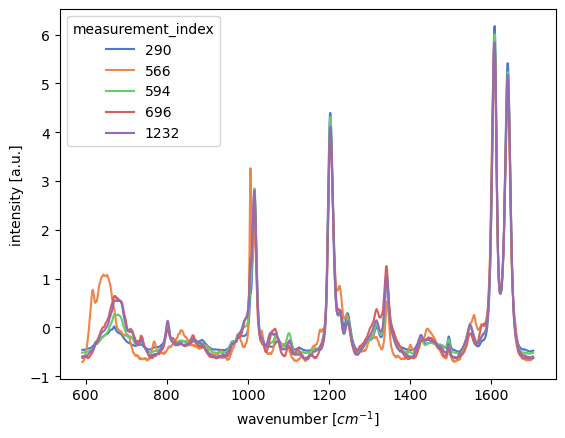

In [6]:
Class = 'E coli'
melt_df = mf.get_melt_df(vector_df)
num_samples = 5
filename = 'samples_from_Ecoli.png'

data = mf.get_random_sample_from_class(melt_df, Class, num_samples)
sns.lineplot(data = data, x = 'wavelength', y = 'intensity', hue = 'measurement_index', palette='muted')
plt.xlabel('wavenumber [$cm^{-1}$]')
plt.ylabel('intensity [a.u.]')
plt.savefig(image_filepath + '/' + filename)
plt.show()

### How do samples from another class compare to each other?

E coli
H influenza
N meningitidis
S pneumoniae


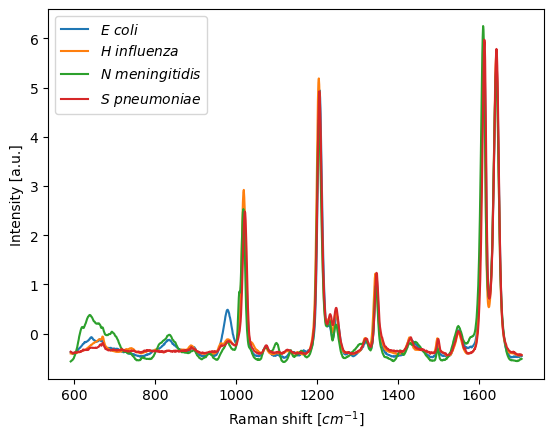

In [7]:
melt_df = mf.get_melt_df(vector_df)
num_samples_per_class = 1
filename = 'samples_from_different_classes.png'

df_array = []
for Class in vector_df.loc[:, 'Class'].unique(): 
    print(Class)
    df_array += [mf.mf.get_random_sample_from_class(melt_df, Class, num_samples_per_class)]
concat_df = pd.concat(df_array)

sns.lineplot(data = mf.replace_bacterial_names_for_plotting(concat_df), x = 'wavelength', y = 'intensity', hue = 'Class')
plt.xlabel(fln.spectrum_x)
plt.ylabel(fln.spectrum_y)
plt.legend()
plt.savefig(image_filepath + '/' + filename)

#### make a small video about it

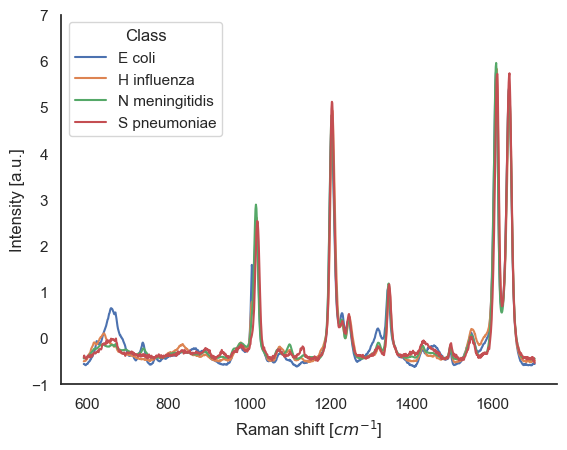

In [34]:
melt_df.loc[:, 'measurement_index']
global meas_class_table
meas_class_table = melt_df[['measurement_index', 'Class']].groupby('measurement_index', as_index = False).first()

frames = 50
# Create a figure and axis
fig, ax = plt.subplots()
sns.set(style="white")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Initialize scatter plot with an empty plot
scatter = sns.scatterplot(ax=ax)

def update_figure(frame):
    # Clear previous plot
    ax.clear()
    #get the sampled indices
    sampled_indices = list(meas_class_table.groupby('Class', as_index = False).sample(1).loc[:, 'measurement_index'])
    #print the sampled indices
    filt = melt_df.loc[:, 'measurement_index'].isin(sampled_indices)
    filt_dataframe = melt_df[filt]
    #plot it
    sns.lineplot(data = filt_dataframe, x= 'wavelength', y = 'intensity', hue= 'Class')
    plt.xlabel(fln.spectrum_x)
    plt.ylabel(fln.spectrum_y)
    plt.ylim(-1,7)

# Create the animation
ani = animation.FuncAnimation(fig, update_figure, frames=frames, interval=100)
ani.save(fp.video_filepath + '/' + 'complexity_animation.mp4', writer='ffmpeg', fps=10)

### What is the average per class and the distribution??

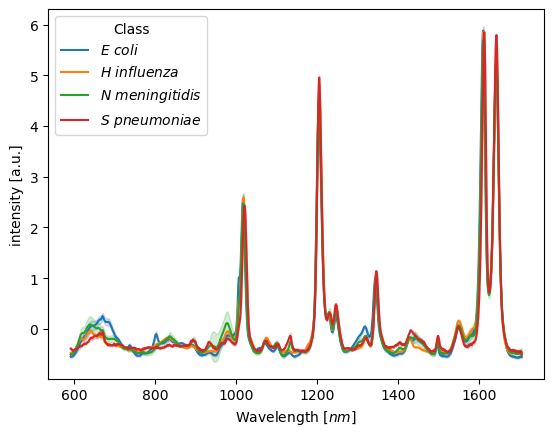

In [7]:
filename = 'averaged_spectra.png'
scale = 10
data = mf.replace_bacterial_names_for_plotting(melt_df)

sns.lineplot(data = data, x = 'wavelength', y = 'intensity', hue = 'Class', errorbar=('se', scale))
plt.xlabel('wavenumber [$cm^{-1}$]')
plt.xlabel('Wavelength [$nm$]')

plt.ylabel('intensity [a.u.]')
plt.savefig(image_filepath + '/' + filename)
plt.show()

### What is the average 

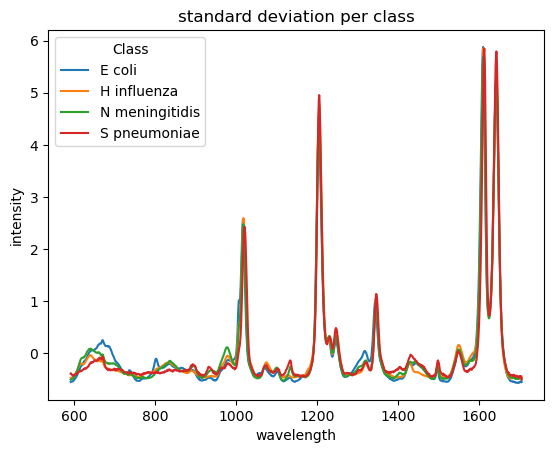

In [8]:
std_df = melt_df.groupby(['Class','wavelength'], as_index = False)['intensity'].mean()
sns.lineplot(data = std_df, x = 'wavelength', y = 'intensity', hue = 'Class')
plt.title('standard deviation per class')
plt.show()

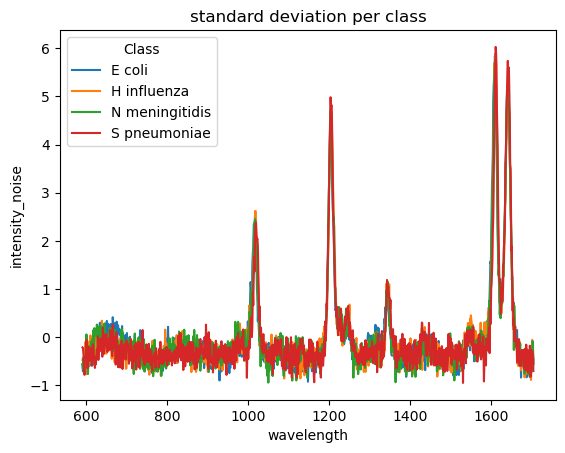

In [18]:
std_df = mf.get_gaussian_noise_intensity(melt_df, 0, 5).groupby(['Class','wavelength'], as_index = False)['intensity_noise'].mean()
sns.lineplot(data = std_df, x = 'wavelength', y = 'intensity_noise', hue = 'Class')
plt.title('standard deviation per class')
plt.show()

### Calculate signal to noise ratio

In [10]:
reload_libraries()

done


KeyboardInterrupt: 

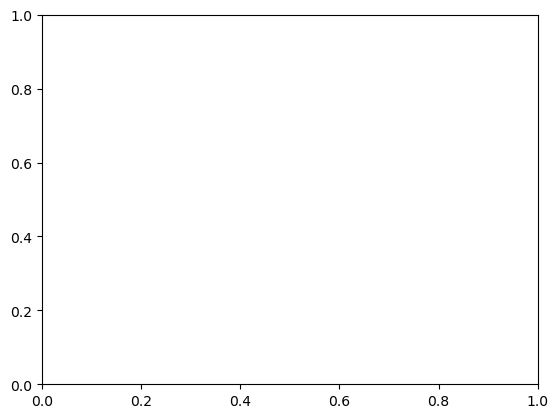

In [19]:
sns.lineplot(mf.get_gaussian_noise_intensity(melt_df, 0, 1), x= 'wavelength', y= 'intensity_noise')

In [42]:
melt_df.copy()

,measurement_index,Class,wavelength,intensity
1282622,0,E coli,1000.8,-0.255437
1286329,0,E coli,1001.9,-0.230708
1290036,0,E coli,1003.1,-0.192117
1293743,0,E coli,1004.2,-0.143665
1297450,0,E coli,1005.3,-0.099369
...,...,...,...,...
1267793,3706,S pneumoniae,995.1,-0.319333
1271500,3706,S pneumoniae,996.2,-0.349634
1275207,3706,S pneumoniae,997.4,-0.271283
1278914,3706,S pneumoniae,998.5,-0.323232


In [41]:
melt_df.loc[:, 'intensity'].min()

-1.1386557901012764

In [51]:
mean = 0
std = 2
min_intensity = melt_df.loc[:, 'intensity'].min()
baseline_corrected_melt_df = melt_df.copy()
baseline_corrected_melt_df.loc[:, 'intensity'] = melt_df.loc[:, 'intensity'] - min_intensity

noise_melt_df = mf.get_gaussian_noise_intensity(baseline_corrected_melt_df, mean, std)
std = noise_melt_df.groupby(['wavelength'], as_index = False)['intensity_noise'].std()
signal = mf.get_mean_spectrum(baseline_corrected_melt_df)
SNR = signal.loc[:, 'intensity']/std.loc[:, 'intensity_noise']

SNR.mean()

0.5634729279850171